
<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 20px; background: linear-gradient(135deg, #9C27B0, #4CAF50); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        🌟  Prediksi Cuaca Harian Menggunakan Fuzzy Inference 🔍
    </h1>
</div>

<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

**Dasar Kecerdasan Artificial---IF 47 - 08**
- ⛄ Nabila Putri Azhari - 103012300316
- ⛄ Jeany Ferliza Nayla - 103012300357


# **Import Library**


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Load Dataset**

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')


In [5]:
df = pd.read_csv('seattle-weather.csv')
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


# **Analisis Dataset**

In [6]:
# Rename kolom unutk mempermudah understanding data

df = df.rename(columns={
    'precipitation': 'Curah Hujan', # Celcius
    'temp_max': 'Suhu max', # Celcius
    'temp_min': 'Suhu min', # Celcius
    'wind': 'Angin', # (%)
    'weather': 'Cuaca Dataset Asli'
})
df.head(5)

,date,Curah Hujan,Suhu max,Suhu min,Angin,Cuaca Dataset Asli
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


### Deskripsi Data

In [7]:
print(df.info())
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1461 non-null   object 
 1   Curah Hujan         1461 non-null   float64
 2   Suhu max            1461 non-null   float64
 3   Suhu min            1461 non-null   float64
 4   Angin               1461 non-null   float64
 5   Cuaca Dataset Asli  1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


(1461, 6)

### Preprocessing Data

##### Cleaning (Drop Nan dan Drop Duplicate)

In [8]:
df.isna().sum() #nan
df = df.drop_duplicates() #duplicate

#### Feature Selection

In [9]:
# fitur = ["Suhu max", "Curah Hujan", "Angin"]
# df = df[fitur]
# df.head()

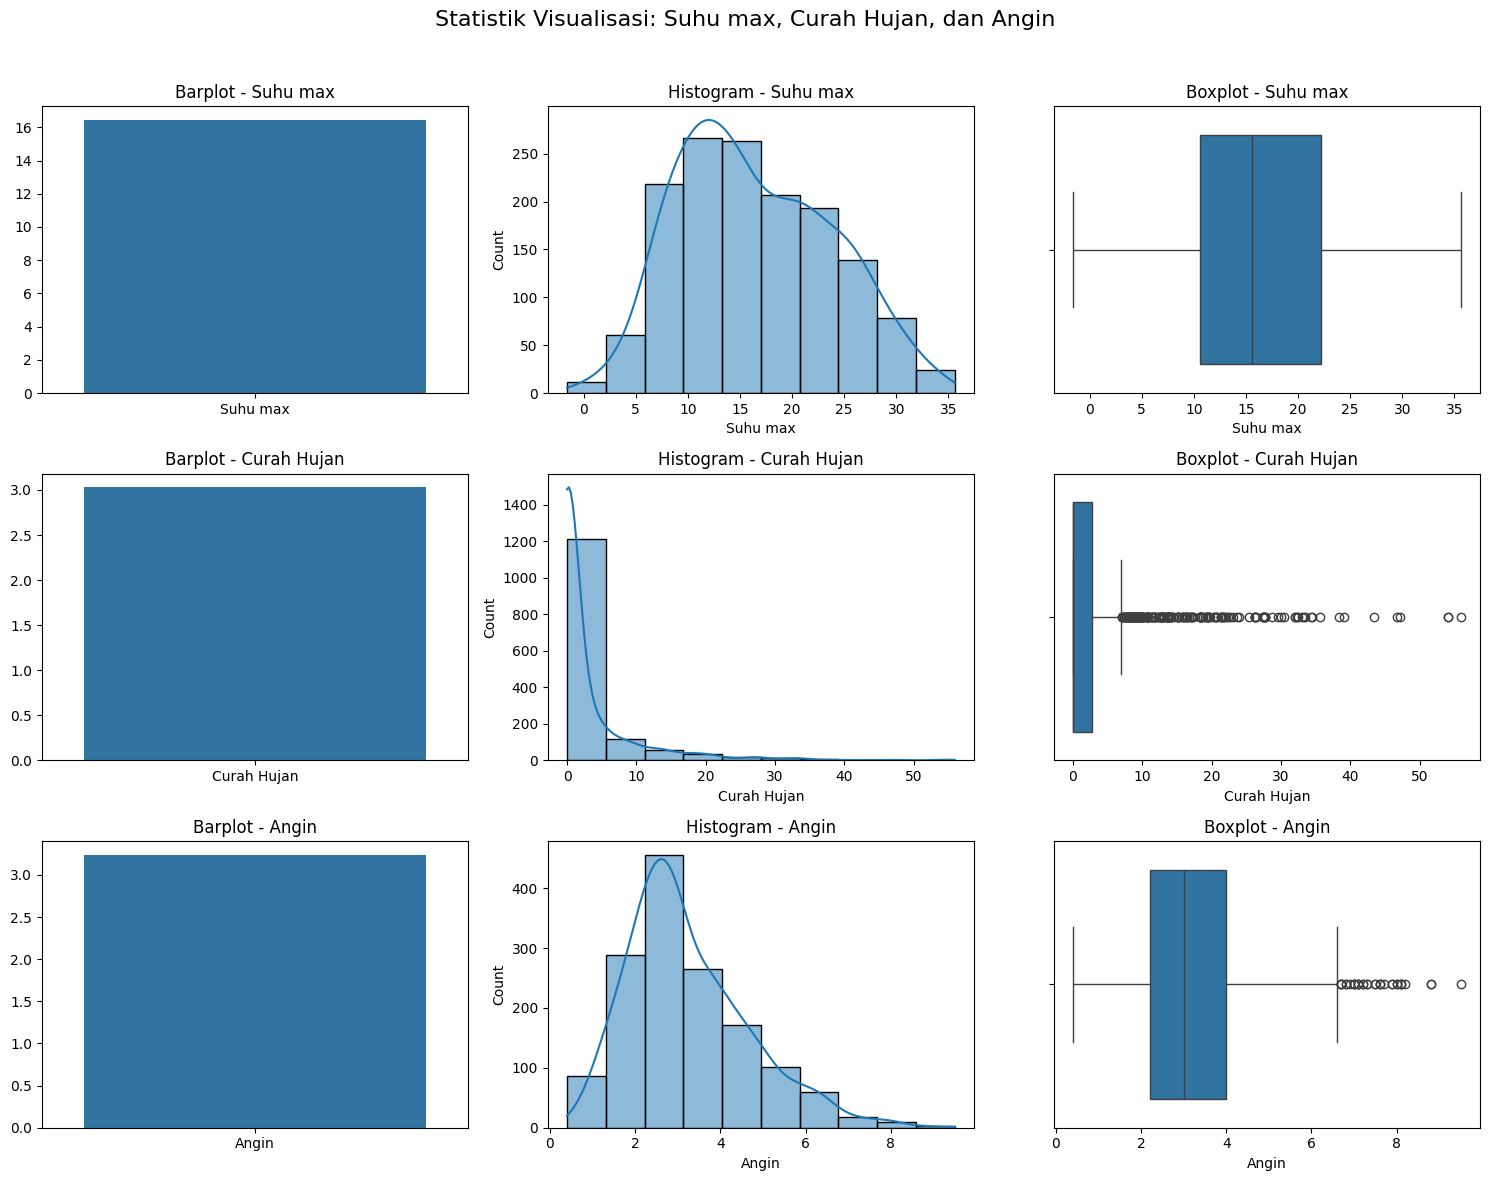

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ganti ini dengan data kamu
# import pandas as pd
# df = pd.read_csv('data.csv')

# Ukuran gambar dan layout
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3 fitur x 3 jenis plot
fig.suptitle('Statistik Visualisasi: Suhu max, Curah Hujan, dan Angin', fontsize=16)

fitur = ['Suhu max', 'Curah Hujan', 'Angin']

for i, kolom in enumerate(fitur):
    # Barplot (menggunakan nilai rata-rata tiap fitur sebagai contoh)
    sns.barplot(x=[kolom], y=[df[kolom].mean()], ax=axes[i, 0])
    axes[i, 0].set_title(f'Barplot - {kolom}')

    # Histogram
    sns.histplot(df[kolom], bins=10, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram - {kolom}')

    # Boxplot
    sns.boxplot(x=df[kolom], ax=axes[i, 2])
    axes[i, 2].set_title(f'Boxplot - {kolom}')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Supaya title tidak ketindih
plt.show()


### Melihat Persebaran Data

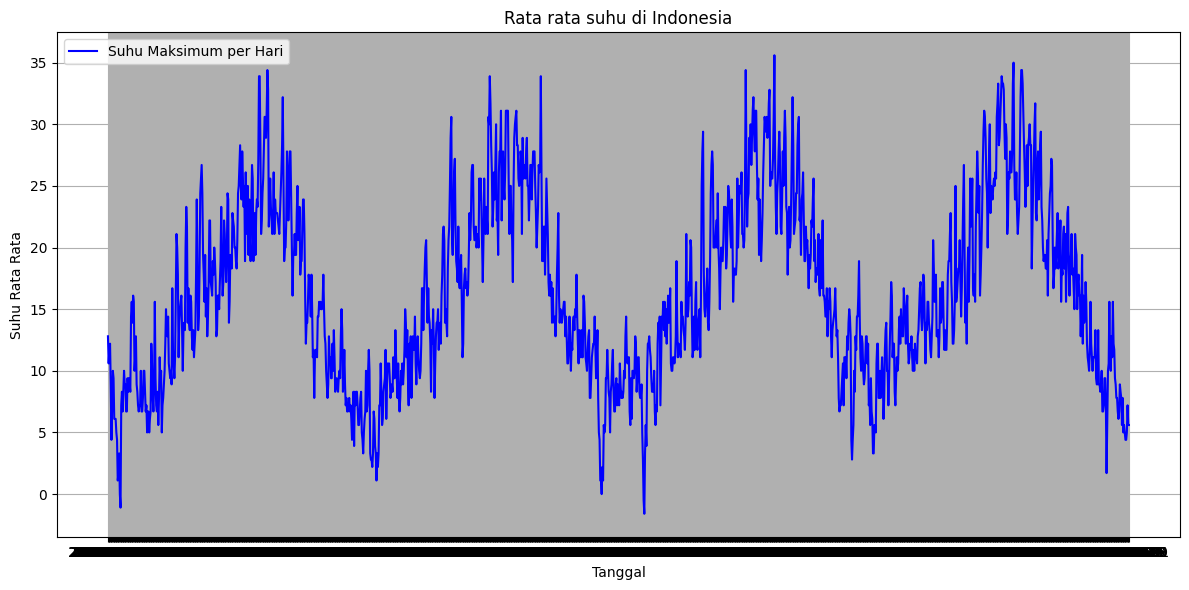

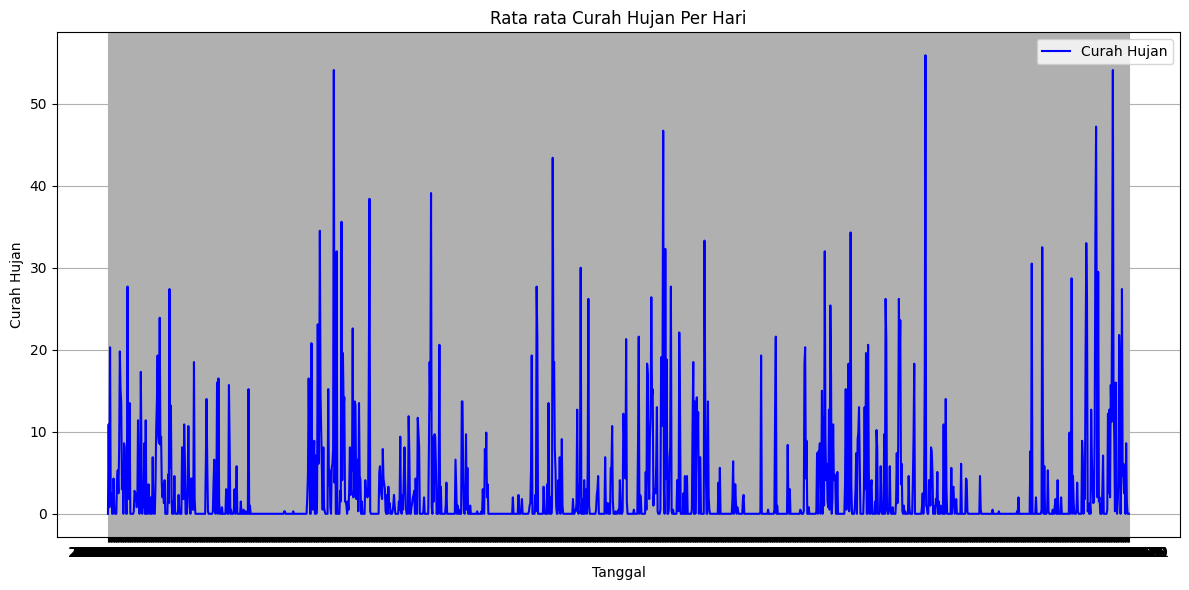

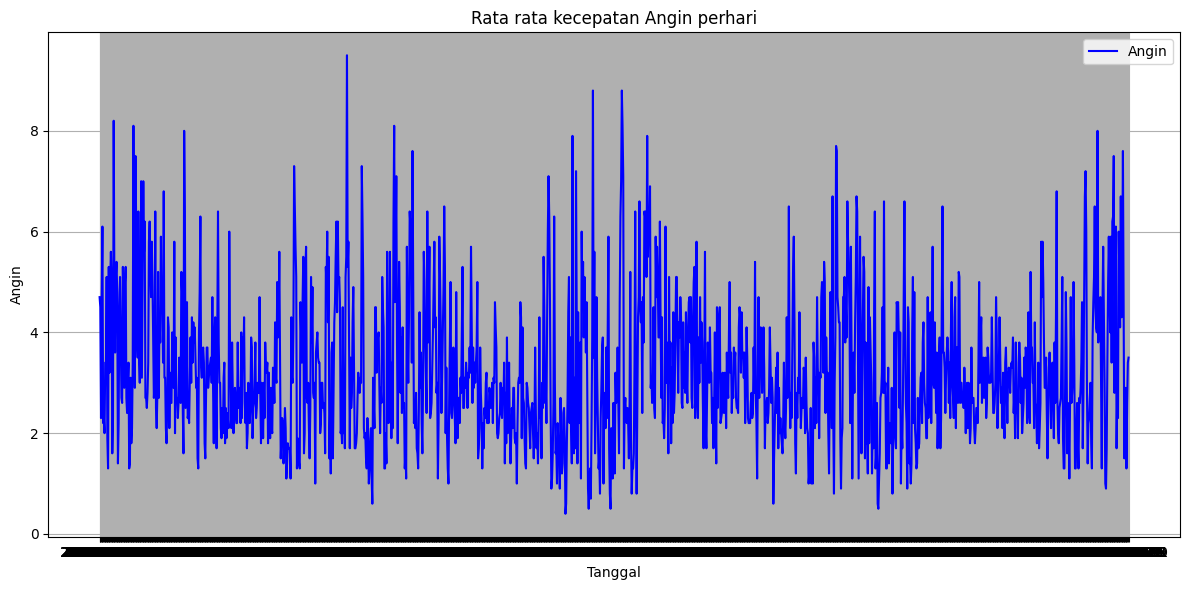

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Suhu max'], label='Suhu Maksimum per Hari', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Suhu Rata Rata')
plt.title('Rata rata suhu di Indonesia')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Curah Hujan'], label='Curah Hujan', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan')
plt.title('Rata rata Curah Hujan Per Hari')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Angin'], label='Angin', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Angin')
plt.title('Rata rata kecepatan Angin perhari')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Melihat persebaran (min max) tiap fitur

In [12]:
minSuhu = df['Suhu max'].min()
maxSuhu = df['Suhu max'].max()
meanSuhu = df['Suhu max'].mean()

print(f"Min Suhu: {minSuhu}")
print(f"Max Suhu: {maxSuhu}")
print(f"Mean Suhu: {meanSuhu}")

minHujan = df['Curah Hujan'].min()
maxHujan = df['Curah Hujan'].max()
meanHujan = df['Curah Hujan'].mean()

print(f"Min Hujan: {minHujan}")
print(f"Max Hujan: {maxHujan}")
print(f"Mean Hujan: {meanHujan}")

minAngin = df['Angin'].min()
maxAngin = df['Angin'].max()
meanAngin = df['Angin'].mean()

print(f"Min Angin: {minAngin}")
print(f"Max Angin: {maxAngin}")
print(f"Mean Angin: {meanAngin}")

Min Suhu: -1.6
Max Suhu: 35.6
Mean Suhu: 16.43908281998631
Min Hujan: 0.0
Max Hujan: 55.9
Mean Hujan: 3.02943189596167
Min Angin: 0.4
Max Angin: 9.5
Mean Angin: 3.24113620807666


# **Membangun Model Fuzzy**

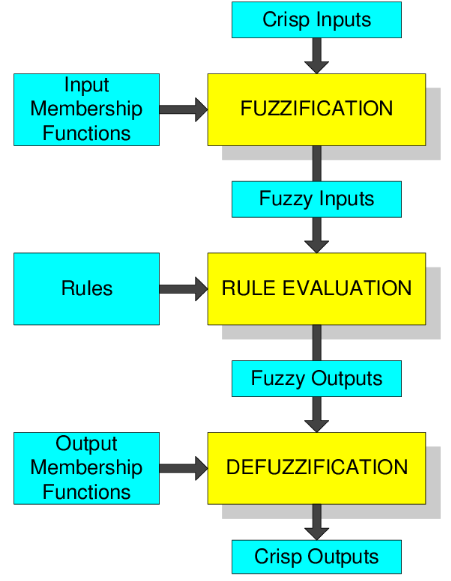

Fuzzy logic adalah metode reasoning yang meniru cara manusia membuat keputusan berdasarkan informasi yang tidak pasti atau tidak tepat. Fuzzy logic memungkinkan nilai kebenaran variabel berkisar antara 0 dan 1, berbeda dengan logika klasik yang hanya mengizinkan nilai kebenaran 0 atau 1.

Cara Kerja Fuzzy Logic
1. Fuzzyfikasi: Proses ini mengubah input yang jelas (crisp input) menjadi nilai fuzzy dengan menggunakan fungsi keanggotaan.
2. Inference: Pada tahap ini, aturan-aturan fuzzy diterapkan untuk menghasilkan output fuzzy. Aturan-aturan ini biasanya berbentuk "jika-maka" (if-then).
3. Defuzzyfikasi: Proses ini mengubah output fuzzy menjadi nilai yang jelas (crisp output atau weight output).

Dua Model Fuzzy Logic
1. Model Mamdani: Model ini menggunakan aturan berbasis fuzzy dan cocok untuk aplikasi yang memerlukan interpretasi manusia. Proses inference pada model Mamdani melibatkan fuzzyfikasi input, penerapan aturan fuzzy, agregasi hasil, dan defuzzyfikasi. Output fuzzy dihasilkan dari agregasi aturan fuzzy dan kemudian di-defuzzyfikasi menggunakan metode seperti centroid atau bisektor

2. Model Sugeno: Model ini menggunakan fungsi output yang lebih sederhana dan sering digunakan dalam sistem kontrol adaptif. Proses inference pada model Sugeno mirip dengan Mamdani, tetapi outputnya adalah fungsi linear atau konstanta. Output fuzzy langsung dihitung menggunakan fungsi linear atau konstanta, sehingga proses defuzzyfikasi lebih sederhana.

### *Mendefinisikan Input*

##### Linguistic Varible
- Suhu: Dingin, Normal, Panas
- Curah Hujan: Lebat, Ringan, Tidak ada
- Angin: Kencang, Pelan,Sedang

# **Fuzzifikasi**

Pembuatan derajat keanggotaan untuk kolom yang akan dianalisis, yakni untuk kolom suhu max(suhu), Curah Hujan dan Angin

In [13]:
# SUHU
def suhu_dingin(suhu):
    if suhu <= 0:
        return 1
    elif 0 < suhu <= 20:
        return (20 - suhu) / (20 - 0)
    else:
        return 0

def suhu_normal(suhu):
    if suhu <= 15 or suhu >= 30:
        return 0
    elif 15 < suhu <= 22:
        return (suhu -15) / (22-15)
    elif 22 < suhu < 30:
        return (30 - suhu) / (30 - 22)
    else:
        return (30-suhu) / (30-22)

def suhu_panas(suhu):
    if suhu <= 24:
        return 0
    elif 24 < suhu <= 30:
        return (suhu - 24) / (30 - 24)
    else:
        return 1



#CURAH HUJAN
def hujan_rendah(hujan):
    if hujan <= 0:
        return 1
    elif 0 < hujan <= 10:
        return (10 - hujan) / (10 - 0)
    else:
        return 0

def hujan_sedang(hujan):
    if hujan <= 5 or hujan >= 25:
        return 0
    elif 5 < hujan <= 15:
        return (hujan - 5) / (15 - 5)
    elif 15 < hujan < 25:
        return (25 - hujan) / (25 - 15)
    else:
        return 1

def hujan_tinggi(hujan):
    if hujan <= 20:
        return 0
    elif hujan <= 60:
        return (hujan - 20) / (60 - 20)
    else:
        return 1


#ANGIN
def angin_pelan(kecepatan):
    if kecepatan <= 1.5:
        return 1.0
    elif 1.5 < kecepatan < 3:
        return (3 - kecepatan) / (3 - 1.5)
    else:
        return 0.0

def angin_sedang(kecepatan):
    if 2 < kecepatan < 4.5:
        return (kecepatan - 2) / (4.5 - 2)
    elif 4.5 <= kecepatan <= 6.5:
        return (6.5 - kecepatan) / (6.5 - 4.5)
    else:
        return 0.0

def angin_kencang(kecepatan):
    if kecepatan <= 5.5:
        return 0.0
    elif 5.5 < kecepatan < 8:
        return (kecepatan - 5.5) / (8 - 5.5)
    else:
        return 1.0


### *Visualisasi Keanggotaan Tiap Fitur*

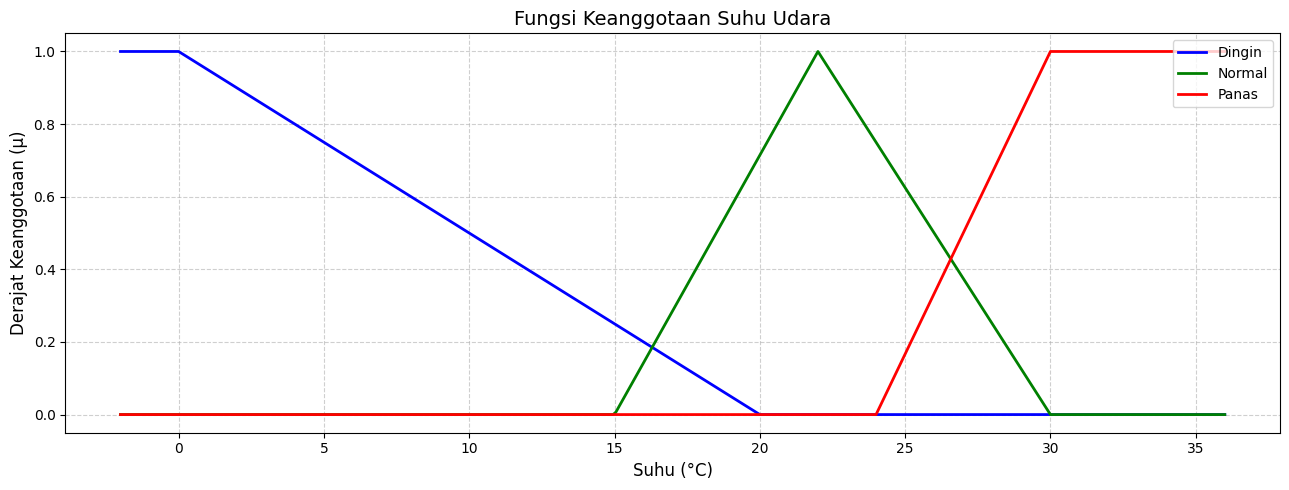

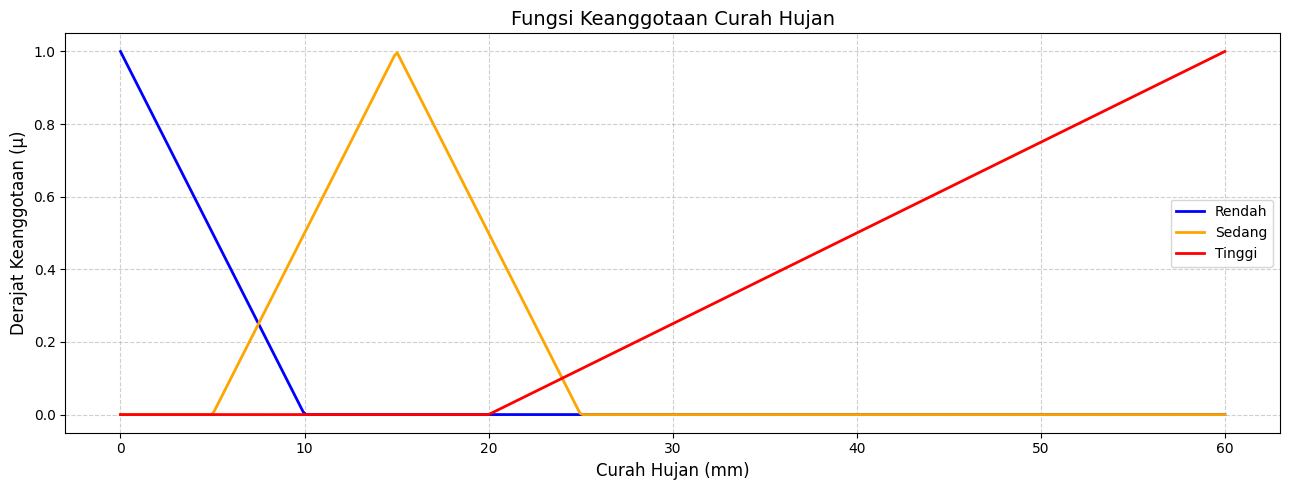

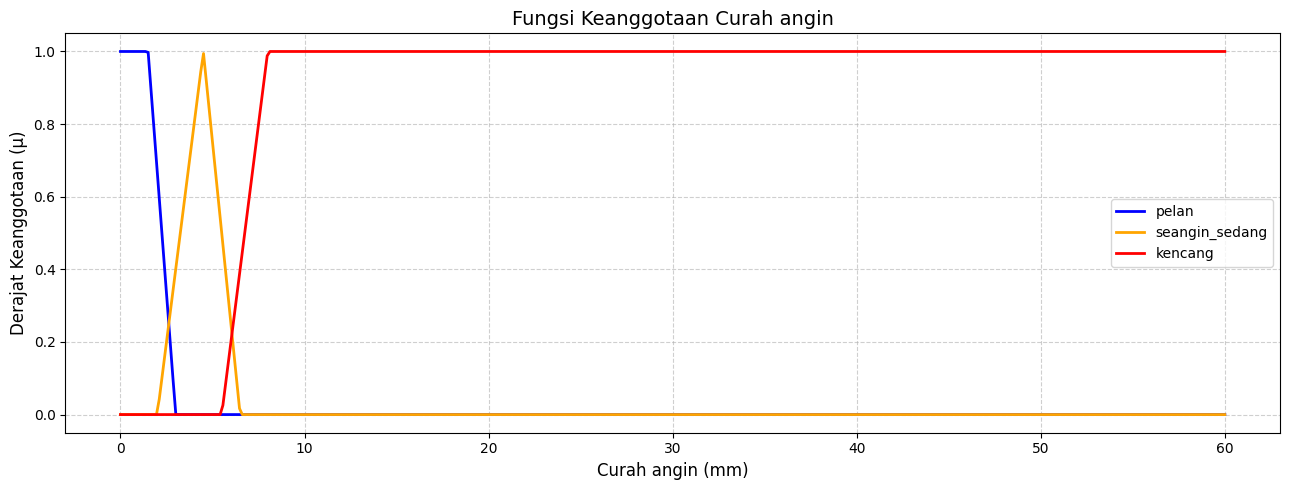

In [14]:

# Rentang suhu dari -2°C sampai 36°C
suhu_range = np.linspace(-2, 36, 400)

# Hitung keanggotaan suhu
anggota_suhu_dingin = [suhu_dingin(s) for s in suhu_range]
anggota_suhu_normal = [suhu_normal(s) for s in suhu_range]
anggota_suhu_panas = [suhu_panas(s) for s in suhu_range]

# Plot fungsi keanggotaan
plt.figure(figsize=(13, 5))
plt.plot(suhu_range, anggota_suhu_dingin, label='Dingin', color='blue', linewidth=2)
plt.plot(suhu_range, anggota_suhu_normal, label='Normal', color='green', linewidth=2)
plt.plot(suhu_range, anggota_suhu_panas, label='Panas', color='red', linewidth=2)

# Label dan dekorasi
plt.title('Fungsi Keanggotaan Suhu Udara', fontsize=14)
plt.xlabel('Suhu (°C)', fontsize=12)
plt.ylabel('Derajat Keanggotaan (μ)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Rentang curah hujan: 0 - 60 mm
hujan_range = np.linspace(0, 60, 400)

# Hitung keanggotaan hujan
anggota_hujan_rendah = [hujan_rendah(h) for h in hujan_range]
anggota_hujan_sedang = [hujan_sedang(h) for h in hujan_range]
anggota_hujan_tinggi = [hujan_tinggi(h) for h in hujan_range]

# Plot
plt.figure(figsize=(13, 5))
plt.plot(hujan_range, anggota_hujan_rendah, label='Rendah', color='blue', linewidth=2)
plt.plot(hujan_range, anggota_hujan_sedang, label='Sedang', color='orange', linewidth=2)
plt.plot(hujan_range, anggota_hujan_tinggi, label='Tinggi', color='red', linewidth=2)

plt.title('Fungsi Keanggotaan Curah Hujan', fontsize=14)
plt.xlabel('Curah Hujan (mm)', fontsize=12)
plt.ylabel('Derajat Keanggotaan (μ)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Rentang curah angin: 0 - 60 mm
angin_range = np.linspace(0, 60, 400)

# Hitung keanggotaan angin
anggota_angin_pelan = [angin_pelan(h) for h in angin_range]
anggota_angin_sedang = [angin_sedang(h) for h in angin_range]
anggota_angin_kencang = [angin_kencang(h) for h in angin_range]

# Plot
plt.figure(figsize=(13, 5))
plt.plot(angin_range, anggota_angin_pelan, label='pelan', color='blue', linewidth=2)
plt.plot(angin_range, anggota_angin_sedang, label='seangin_sedang', color='orange', linewidth=2)
plt.plot(angin_range, anggota_angin_kencang, label='kencang', color='red', linewidth=2)

plt.title('Fungsi Keanggotaan Curah angin', fontsize=14)
plt.xlabel('Curah angin (mm)', fontsize=12)
plt.ylabel('Derajat Keanggotaan (μ)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



### *Mendesain Fuzzy Logic*

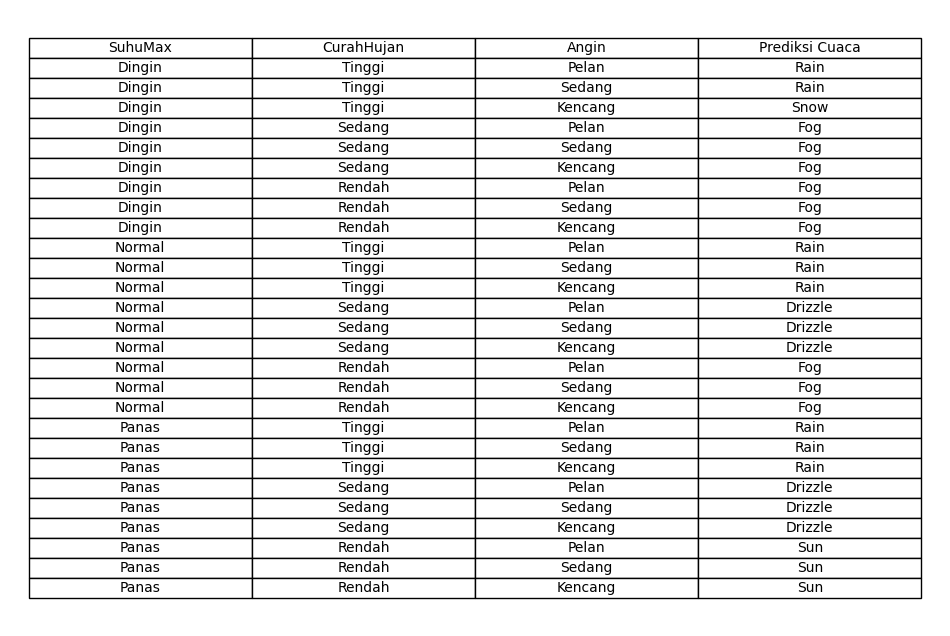

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import table

# Fungsi prediksi cuaca
def prediksi_cuaca(sx, ch, ang):
    if ch == "Tinggi":
        return "Rain" if sx != "Dingin" else ("Snow" if ang == "Kencang" else "Rain")
    elif ch == "Sedang":
        return "Fog" if sx == "Dingin" else "Drizzle"
    else:  # ch == "Rendah"
        return "Sun" if sx == "Panas" else "Fog"

# Daftar kategori
suhu_max_list = ["Dingin", "Normal", "Panas"]
curah_hujan_list = ["Tinggi", "Sedang", "Rendah"]
angin_list = ["Pelan", "Sedang", "Kencang"]

# Generate aturan
rules = []
for sx in suhu_max_list:
    for ch in curah_hujan_list:
        for ang in angin_list:
            rules.append({
                "SuhuMax": sx,
                "CurahHujan": ch,
                "Angin": ang,
                "Prediksi Cuaca": prediksi_cuaca(sx, ch, ang)
            })

df_rules = pd.DataFrame(rules)

# Tampilkan tabel dengan matplotlib
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

# Ubah df menjadi cellText dan colLabels
cell_text = df_rules.values.tolist()
col_labels = df_rules.columns.tolist()

tbl = ax.table(
    cellText=cell_text,
    colLabels=col_labels,
    loc='center',
    cellLoc='center',
    colWidths=[0.2] * len(col_labels)
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

#Aturan Fuzzy Logic
plt.show()


### *Mendefinisikan Output*

In [16]:
def output_snow(x):
    if x <= 5:
        return 1
    elif 5 < x < 15:
        return (15 - x) / (15 - 5)
    else:
        return 0

def output_rain(x):
    if x <= 20 or x >= 40:
        return 0
    elif 20 < x < 30:
        return (x - 20) / (30 - 20)
    elif 30 <= x < 40:
        return (40 - x) / (40 - 30)
    else:
        return 0

def output_drizzle(x):
    if x <= 35 or x >= 65:
        return 0
    elif 35 < x < 50:
        return (x - 35) / (50 - 35)
    elif 50 <= x < 65:
        return (65 - x) / (65 - 50)
    else:
        return 0

def output_fog(x):
    if x <= 40:
        return 0
    elif 40 < x <= 60:
        return (x - 40) / (60 - 40)
    elif 60 < x < 80:
        return 1
    elif 80 <= x <= 90:
        return (90 - x) / (90 - 80)
    else:
        return 0


def output_sun(x):
    if x <= 60:
        return 0
    elif 60 < x <= 75:
        return (x - 60) / (75 - 60)
    elif 75 < x < 90:
        return 1
    elif 90 <= x <= 100:
        return (100 - x) / (100 - 90)
    else:
        return 0


### *Fuzzy Inference*

In [17]:
def fuzzy_inference(suhu, hujan, angin):
    suhu_vals = {
        "dingin": suhu_dingin(suhu),
        "normal": suhu_normal(suhu),
        "panas": suhu_panas(suhu)
    }
    hujan_vals = {
        "rendah": hujan_rendah(hujan),
        "sedang": hujan_sedang(hujan),
        "tinggi": hujan_tinggi(hujan)
    }
    angin_vals = {
        "pelan": angin_pelan(angin),
        "sedang": angin_sedang(angin),
        "kencang": angin_kencang(angin)
    }

    output_labels = ["Snow", "Rain", "Drizzle", "Fog", "Sun"]
    result = {label: 0 for label in output_labels}

    rules = [
        # Rain kuat saat suhu dingin/normal, hujan tinggi/sedang, angin pelan/sedang
        ("dingin", "tinggi", "pelan", "Rain"),
        ("dingin", "tinggi", "sedang", "Rain"),
        ("dingin", "sedang", "pelan", "Rain"),
        ("dingin", "sedang", "sedang", "Rain"),
        ("normal", "tinggi", "pelan", "Rain"),
        ("normal", "tinggi", "sedang", "Rain"),
        ("normal", "sedang", "pelan", "Rain"),
        ("normal", "sedang", "sedang", "Rain"),

        # Drizzle saat hujan sedang + suhu normal/panas + angin pelan
        ("normal", "sedang", "pelan", "Drizzle"),
        ("normal", "sedang", "sedang", "Drizzle"),
        ("panas", "sedang", "pelan", "Drizzle"),
        ("panas", "sedang", "sedang", "Drizzle"),

        # Snow hanya jika suhu dingin dan angin kencang
        ("dingin", "tinggi", "kencang", "Snow"),

        # Fog dari kombinasi suhu dingin/normal dan hujan rendah
        ("dingin", "rendah", "pelan", "Fog"),
        ("dingin", "rendah", "sedang", "Fog"),
        ("normal", "rendah", "pelan", "Fog"),
        ("normal", "rendah", "sedang", "Fog"),

        # Sun jika suhu panas dan hujan rendah
        ("panas", "rendah", "pelan", "Sun"),
        ("panas", "rendah", "sedang", "Sun"),
        ("panas", "rendah", "kencang", "Sun"),
        ("normal", "rendah", "sedang", "Sun"),
        ("normal", "rendah", "kencang", "Sun"),
        ("normal", "rendah", "sedang", "Sun"),
        ("normal", "rendah", "kencang", "Sun"),
        ("dingin", "rendah", "kencang", "Sun"),
    ]

    for suhu_label, hujan_label, angin_label, output_label in rules:
        μ = min(
            suhu_vals[suhu_label],
            hujan_vals[hujan_label],
            angin_vals[angin_label]
        )
        result[output_label] = max(result[output_label], μ)

    return result


### *Defuzzifikasi*

In [18]:
def defuzzifikasi(hasil):
    x = np.linspace(0, 100, 500)
    numerator = 0
    denominator = 0

    for xi in x:
        μ = max(
            min(hasil["Snow"], output_snow(xi)),
            min(hasil["Rain"], output_rain(xi)),
            min(hasil["Drizzle"], output_drizzle(xi)),
            min(hasil["Fog"], output_fog(xi)),
            min(hasil["Sun"], output_sun(xi))
        )
        numerator += xi * μ
        denominator += μ

    return numerator / denominator if denominator != 0 else 0


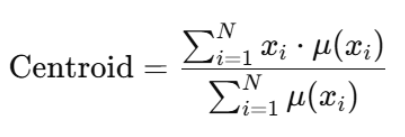

# **Fuzzy Mamdani**

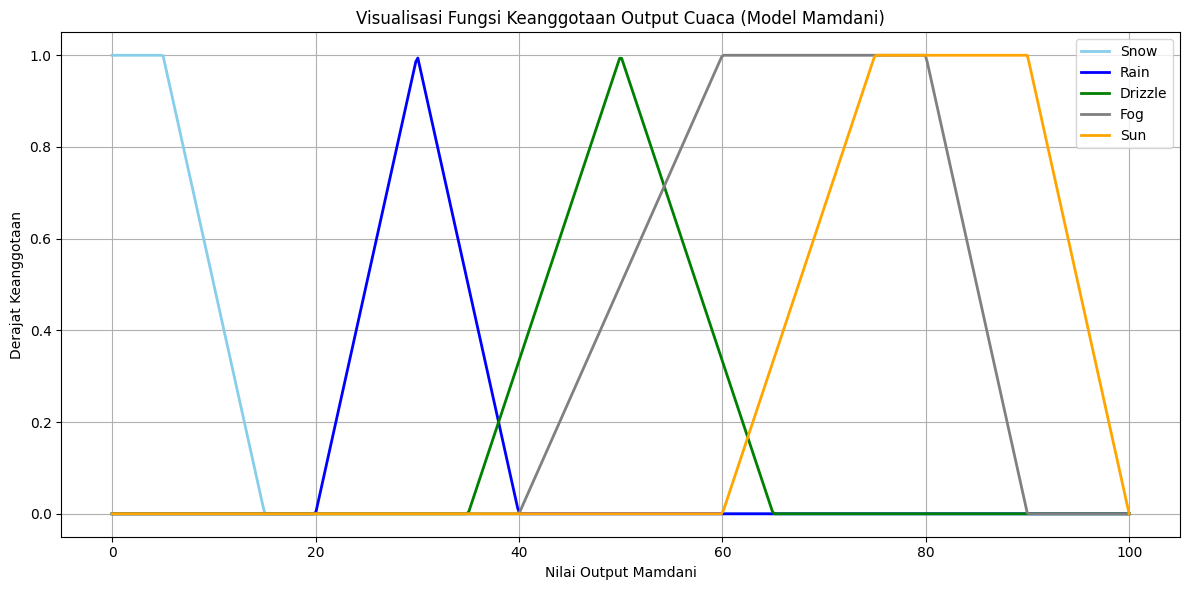

In [19]:
# Rentang nilai output fuzzy
x = np.linspace(0, 100, 500)

# Hitung nilai fungsi keanggotaan dari semua kategori
y_snow = [output_snow(val) for val in x]
y_rain = [output_rain(val) for val in x]
y_drizzle = [output_drizzle(val) for val in x]
y_fog = [output_fog(val) for val in x]
y_sun = [output_sun(val) for val in x]

# Plot semua fungsi keanggotaan
plt.figure(figsize=(12, 6))
plt.plot(x, y_snow, label="Snow", color="skyblue", linewidth=2)
plt.plot(x, y_rain, label="Rain", color="blue", linewidth=2)
plt.plot(x, y_drizzle, label="Drizzle", color="green", linewidth=2)
plt.plot(x, y_fog, label="Fog", color="gray", linewidth=2)
plt.plot(x, y_sun, label="Sun", color="orange", linewidth=2)

plt.title("Visualisasi Fungsi Keanggotaan Output Cuaca (Model Mamdani)")
plt.xlabel("Nilai Output Mamdani")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
def interpretasi_fuzzy(skor):
    sn = output_snow(skor)
    r = output_rain(skor)
    d = output_drizzle(skor)
    f = output_fog(skor)
    su = output_sun(skor)

    max_μ = max(sn, r, d, f, su)
    if max_μ == sn:
        return "Snow"
    elif max_μ == r:
        return "Rain"
    elif max_μ == d:
        return "Drizzle"
    elif max_μ == f:
        return "Fog"
    else:
        return "Sun"


In [21]:
def classify_weather(row):
    hasil_inferensi = fuzzy_inference(row['Suhu max'], row['Curah Hujan'], row['Angin'])
    return defuzzifikasi(hasil_inferensi)

df['Model Mamdani'] = df.apply(classify_weather, axis=1)
df['Kategori Cuaca Mamdani'] = df['Model Mamdani'].apply(interpretasi_fuzzy)

df[['Suhu max', 'Curah Hujan', 'Angin','Cuaca Dataset Asli', 'Model Mamdani','Kategori Cuaca Mamdani']].tail(20)


,Suhu max,Curah Hujan,Angin,Cuaca Dataset Asli,Model Mamdani,Kategori Cuaca Mamdani
1441,8.9,16.0,5.6,rain,30.000329,Rain
1442,7.8,1.3,6.1,rain,71.577187,Fog
1443,7.8,0.0,1.7,sun,66.410882,Fog
1444,6.7,1.5,2.9,rain,65.863549,Fog
1445,6.1,3.6,2.3,rain,66.103090,Fog
1446,6.7,21.8,6.0,rain,26.994022,Rain
1447,8.9,18.5,5.1,rain,30.000382,Rain
1448,8.3,0.0,4.1,fog,66.358534,Fog
1449,7.8,4.3,6.7,rain,80.564460,Sun
1450,5.6,27.4,4.3,rain,29.999484,Rain


# **Fuzzy Sugeno**

### *Fungsi Keanggotaan Output Sugeno*

In [22]:
def anggota_snow_sugeno(x):
    return 1 if x == 10 else 0

def anggota_rain_sugeno(x):
    return 1 if x == 30 else 0

def anggota_drizzle_sugeno(x):
    return 1 if x == 45 else 0

def anggota_fog_sugeno(x):
    return 1 if x == 60 else 0

def anggota_sun_sugeno(x):
    return 1 if x == 90 else 0


In [23]:
# Rentang output cuaca
cuaca_range = np.arange(0, 100, 0.1)
snow_ = [anggota_snow_sugeno(x) for x in cuaca_range]
rain_ = [anggota_rain_sugeno(x) for x in cuaca_range]
drizzle_ = [anggota_drizzle_sugeno(x) for x in cuaca_range]
fog_ = [ anggota_fog_sugeno(x) for x in cuaca_range]
sun_ = [anggota_sun_sugeno(x) for x in cuaca_range]

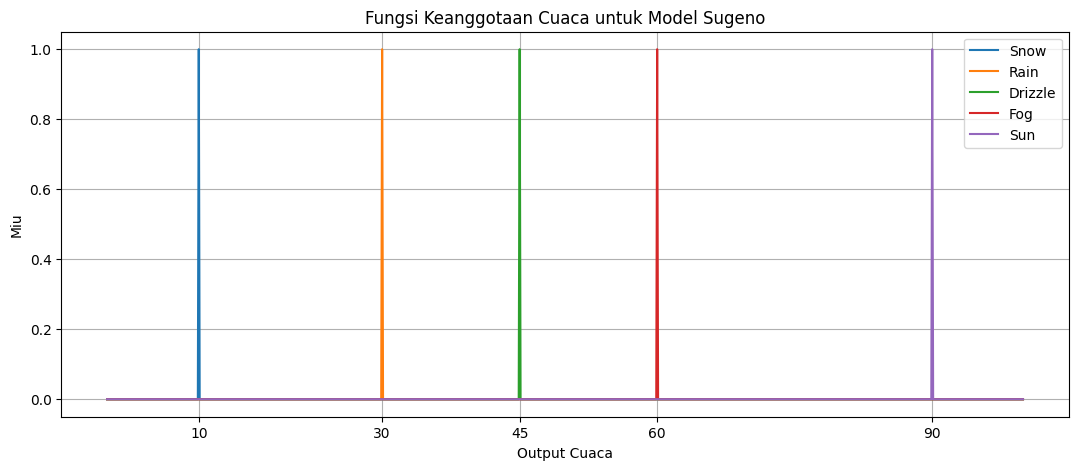

In [24]:
# Visualisasi fungsi keanggotaan Sugeno
plt.figure(figsize=(13, 5))
plt.plot(cuaca_range, snow_, label='Snow')
plt.plot(cuaca_range, rain_, label='Rain')
plt.plot(cuaca_range, drizzle_, label='Drizzle')
plt.plot(cuaca_range, fog_, label='Fog')
plt.plot(cuaca_range, sun_, label='Sun')
plt.title('Fungsi Keanggotaan Cuaca untuk Model Sugeno')
plt.xlabel('Output Cuaca')
plt.xticks([10, 30, 45, 60, 90])
plt.ylabel('Miu')
plt.legend()
plt.grid(True)
plt.show()

### *Perhitungan Nilai Sugeno Menggunakan Weighted Average*

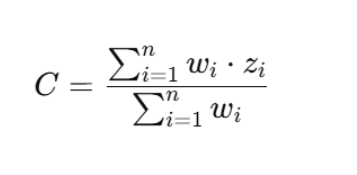

In [25]:
def weighted_average_sugeno(fuzzy_sets):
    total = sum(fuzzy_sets.values())
    if total == 0:
        return 0  # fallback
    return (fuzzy_sets['Snow'] * 10 +
            fuzzy_sets['Rain'] * 30 +
            fuzzy_sets['Drizzle'] * 45 +
            fuzzy_sets['Fog'] * 60 +
            fuzzy_sets['Sun'] * 90) / total


### *Prediksi Berdasarkan Input Fuzzy*

In [26]:
def prediksi_dengan_model_sugeno_cuaca(suhu, hujan, angin):
    fuzzy_sets = fuzzy_inference(suhu, hujan, angin)
    return weighted_average_sugeno(fuzzy_sets)


In [27]:
def classify_cuaca_sugeno(row):
    return prediksi_dengan_model_sugeno_cuaca(
        row['Suhu max'], row['Curah Hujan'], row['Angin']
    )

df['Model Sugeno'] = df.apply(classify_cuaca_sugeno, axis=1)


In [28]:
# Fungsi kategori berdasarkan nilai output Sugeno
def kategori_cuaca_sugeno(nilai):
    kategori_map = {
        'Snow': 10,
        'Rain': 30,
        'Drizzle': 45,
        'Fog': 60,
        'Sun': 90
    }
    return min(kategori_map, key=lambda k: abs(nilai - kategori_map[k]))

# Tambahkan kolom kategori berdasarkan output Sugeno
df['Kategori Cuaca Sugeno'] = df['Model Sugeno'].apply(kategori_cuaca_sugeno)
df[['Suhu max', 'Curah Hujan', 'Angin','Cuaca Dataset Asli', 'Model Mamdani','Kategori Cuaca Mamdani', 'Model Sugeno', 'Kategori Cuaca Sugeno']].tail(20)


,Suhu max,Curah Hujan,Angin,Cuaca Dataset Asli,Model Mamdani,Kategori Cuaca Mamdani,Model Sugeno,Kategori Cuaca Sugeno
1441,8.9,16.0,5.6,rain,30.000329,Rain,30.000000,Rain
1442,7.8,1.3,6.1,rain,71.577187,Fog,76.363636,Sun
1443,7.8,0.0,1.7,sun,66.410882,Fog,60.000000,Fog
1444,6.7,1.5,2.9,rain,65.863549,Fog,60.000000,Fog
1445,6.1,3.6,2.3,rain,66.103090,Fog,60.000000,Fog
1446,6.7,21.8,6.0,rain,26.994022,Rain,26.949153,Rain
1447,8.9,18.5,5.1,rain,30.000382,Rain,30.000000,Rain
1448,8.3,0.0,4.1,fog,66.358534,Fog,60.000000,Fog
1449,7.8,4.3,6.7,rain,80.564460,Sun,90.000000,Sun
1450,5.6,27.4,4.3,rain,29.999484,Rain,30.000000,Rain


# **Akurasi Model Prediksi**

### *SMAPE (Symmetric Mean Absolute Percentage Error)*

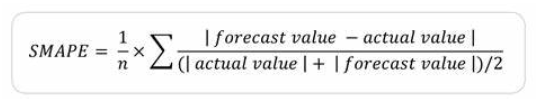

In [29]:
cuaca_ke_angka = {
    'snow': 10,
    'rain': 30,
    'drizzle': 45,
    'fog': 60,
    'sun': 90
}

# Mapping nilai cuaca aktual dan prediksi Sugeno
df['pred_sugeno_num'] = df['Kategori Cuaca Sugeno'].map(cuaca_ke_angka)

df['weather_num'] = df['Cuaca Dataset Asli'].str.lower().map(cuaca_ke_angka)
df['pred_sugeno_num'] = df['Kategori Cuaca Sugeno'].str.lower().map(cuaca_ke_angka)

# Hitung SMAPE
def smape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0
    return np.mean(diff) * 100

df_valid = df.dropna(subset=['weather_num', 'pred_sugeno_num'])
nilai_smape = smape(df_valid['weather_num'], df_valid['pred_sugeno_num'])

print(f'SMAPE Model Sugeno: {nilai_smape:.2f}%')


df['pred_mamdani_num'] = df['Kategori Cuaca Mamdani'].str.lower().map(cuaca_ke_angka)
df_valid_mamdani = df.dropna(subset=['weather_num', 'pred_mamdani_num'])
nilai_smape_mamdani = smape(df_valid_mamdani['weather_num'], df_valid_mamdani['pred_mamdani_num'])

print(f'SMAPE Model Mamdani: {nilai_smape_mamdani:.2f}%')



SMAPE Model Sugeno: 40.96%
SMAPE Model Mamdani: 43.27%


# *MAE (Mean Absolute Eror)*

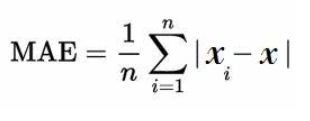

In [30]:
def mae(acutal,predicted):
  return np.mean(np.abs(acutal-predicted))

print(f"Mean Abosulte Error Mamdani: {mae(df['weather_num'],df['pred_mamdani_num'])}")

Mean Abosulte Error Mamdani: 23.870636550308006


Berdasarkan hasil evaluasi kedua model di atas menggunakan Symmetric Mean Absolute Percentage Error (SMAPE) dan Mean Absolute Error (MAE),
dapat disimpulkan bahwa model Sugeno memiliki performa yang lebih baik dibandingkan dengan model Mamdani.

**Beberapa Faktor Penyebab mendapat akurasi tersebut
Karakteristik Data**


Karakteristik Data


- Data yang digunakan mungkin memiliki variabilitas tinggi atau terdapat outlier yang signifikan sehingga mempengaruhi performa model.

Model dan Parameter Fuzzy

- Fungsi keanggotaan (membership functions) yang digunakan dalam model fuzzy mungkin kurang representatif atau tidak teroptimasi dengan baik.

- Rule base atau aturan fuzzy yang digunakan bisa jadi kurang lengkap atau tidak sesuai dengan pola data yang ada.

**Kesimpulan Karakteristik Fuzzy Logic**

* Berbasis aturan linguistik, misalnya: "Jika suhu panas dan curah hujan tinggi
maka cuaca kemungkinan hujan."

* Tidak memerlukan data latih dalam jumlah besar.

* Sangat bagus untuk interpretabilitas dan logika manusia.

* Tidak belajar dari data → hanya mengandalkan aturan statis buatan manusia.

* Tidak ada proses optimisasi parameter otomatis.

## **Membangun Aplikasi Fuzzy Model Sugeno**

In [31]:
# # Program Utama Fuzzy Cuaca (Model Sugeno dengan interpretasi fungsi keanggotaan output)
# def prediksi_cuaca_sugeno():
#     print("=" * 60)
#     print("Program Prediksi Cuaca Harian Menggunakan Fuzzy Inference".center(60))
#     print("=" * 60)

#     try:
#         suhu = float(input("Masukkan suhu (°C): "))
#         hujan = float(input("Masukkan curah hujan (mm): "))
#         angin = float(input("Masukkan kecepatan angin (km/jam): "))
#     except ValueError:
#         print("Input tidak valid. Pastikan Anda memasukkan angka.")
#         return

#     # Proses inferensi fuzzy
#     hasil = fuzzy_inference(suhu, hujan, angin)

#     # Defuzzyfikasi dengan weighted average (model Sugeno)
#     skor_output = {
#         "Snow": 0,
#         "Fog": 25,
#         "Rain": 50,
#         "Drizzle": 75,
#         "Sun": 100
#     }

#     total_mu = sum(hasil.values())
#     if total_mu == 0:
#         weighted_avg = 0
#     else:
#         weighted_avg = sum(hasil[label] * skor_output[label] for label in hasil) / total_mu

#     # Interpretasi skor berdasarkan fungsi keanggotaan output
#     prediksi_kategori = interpretasi_fuzzy(weighted_avg)

#     print("\nHasil Prediksi Cuaca:")
#     print("-" * 30)
#     print(f"Kategori Cuaca: {prediksi_kategori}")
#     print(f"Nilai Weighted Average: {weighted_avg:.2f}")
#     print("=" * 60)

#     # Opsi lanjutan
#     print("\nApa yang ingin Anda lakukan selanjutnya?")
#     print("1. Simpan hasil ke file")
#     print("2. Proses data baru")
#     print("3. Keluar dari program")
#     pilihan = input("Pilihan Anda (1/2/3): ")

#     if pilihan == "1":
#         nama_file = input("Masukkan nama file untuk menyimpan hasil: ")
#         try:
#             with open(nama_file, "w") as file:
#                 file.write(f"Suhu (°C): {suhu}\n")
#                 file.write(f"Curah Hujan (mm): {hujan}\n")
#                 file.write(f"Kecepatan Angin (km/jam): {angin}\n")
#                 file.write(f"Kategori Cuaca: {prediksi_kategori}\n")
#                 file.write(f"Nilai Weighted Average: {weighted_avg:.2f}\n")
#             print(f"Hasil berhasil disimpan ke dalam file '{nama_file}'.")
#         except Exception as e:
#             print(f"Gagal menyimpan file: {e}")
#     elif pilihan == "2":
#         prediksi_cuaca_sugeno()
#     elif pilihan == "3":
#         print("Terima kasih telah menggunakan program ini.")
#     else:
#         print("Pilihan tidak valid.")


# prediksi_cuaca_sugeno()


## **Membangun Aplikasi Fuzzy Model Mamdani**

In [32]:
# def prediksi_cuaca_mamdani():
#     print("=" * 60)
#     print("Program Prediksi Cuaca Harian (Model Mamdani)".center(60))
#     print("=" * 60)

#     try:
#         suhu = float(input("Masukkan suhu (°C): "))
#         hujan = float(input("Masukkan curah hujan (mm): "))
#         angin = float(input("Masukkan kecepatan angin (km/jam): "))
#     except ValueError:
#         print("Input tidak valid. Pastikan Anda memasukkan angka.")
#         return

#     # Proses inferensi fuzzy model Mamdani
#     hasil = fuzzy_inference(suhu, hujan, angin)

#     # Defuzzyfikasi Mamdani menggunakan metode centroid
#     domain_output = {
#         "Snow": 0,
#         "Fog": 25,
#         "Rain": 50,
#         "Drizzle": 75,
#         "Sun": 100
#     }

#     total_mu = sum(hasil.values())
#     if total_mu == 0:
#         centroid = 0
#     else:
#         centroid = sum(hasil[label] * domain_output[label] for label in hasil) / total_mu

#     # Interpretasi skor menggunakan fungsi keanggotaan output
#     prediksi_kategori = interpretasi_fuzzy(centroid)

#     print("\nHasil Prediksi Cuaca (Model Mamdani):")
#     print("-" * 30)
#     print(f"Kategori Cuaca: {prediksi_kategori}")
#     print(f"Nilai Centroid: {centroid:.2f}")
#     print("=" * 60)

#     # Opsi lanjutan
#     print("\nApa yang ingin Anda lakukan selanjutnya?")
#     print("1. Simpan hasil ke file")
#     print("2. Proses data baru")
#     print("3. Keluar dari program")
#     pilihan = input("Pilihan Anda (1/2/3): ")

#     if pilihan == "1":
#         nama_file = input("Masukkan nama file untuk menyimpan hasil: ")
#         try:
#             with open(nama_file, "w") as file:
#                 file.write(f"Suhu (°C): {suhu}\n")
#                 file.write(f"Curah Hujan (mm): {hujan}\n")
#                 file.write(f"Kecepatan Angin (km/jam): {angin}\n")
#                 file.write(f"Kategori Cuaca: {prediksi_kategori}\n")
#                 file.write(f"Nilai Centroid: {centroid:.2f}\n")
#             print(f"Hasil berhasil disimpan ke dalam file '{nama_file}'.")
#         except Exception as e:
#             print(f"Gagal menyimpan file: {e}")
#     elif pilihan == "2":
#         prediksi_cuaca_mamdani()
#     elif pilihan == "3":
#         print("Terima kasih telah menggunakan program ini.")
#     else:
#         print("Pilihan tidak valid.")



# prediksi_cuaca_mamdani()

# **Perbandingan dengan Machine Learning**

##### *XGBOOST*

### Import Library

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### Label Encoding

In [34]:
df['Cuaca Dataset Asli']=LabelEncoder().fit_transform(df['Cuaca Dataset Asli'])

### Visualisasi

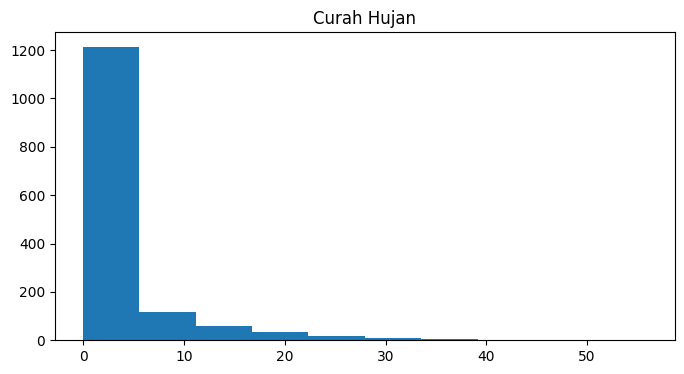

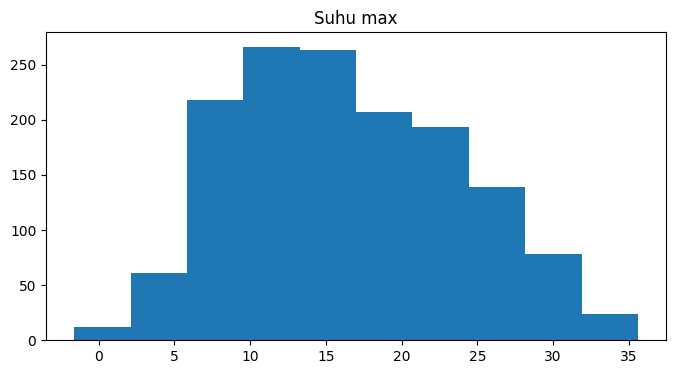

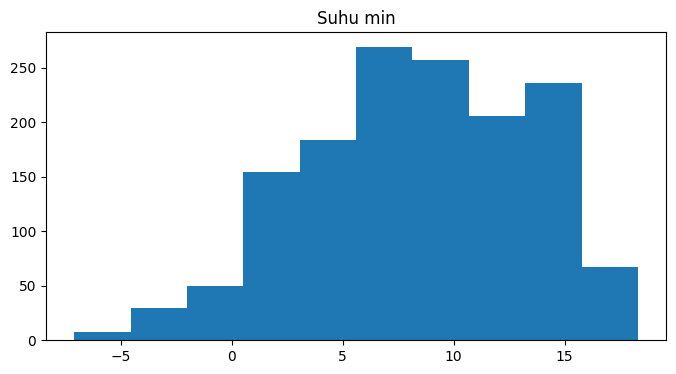

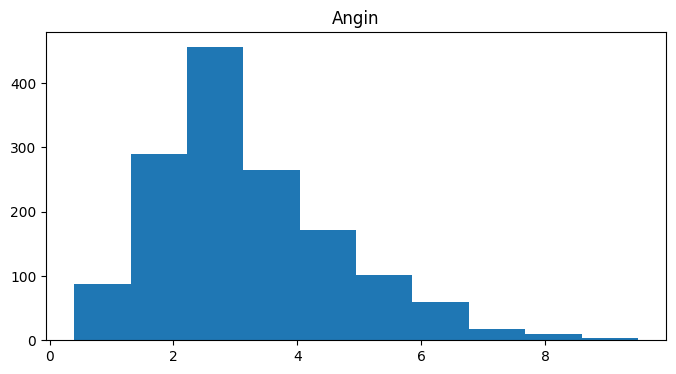

In [35]:
num=['Curah Hujan', 'Suhu max', 'Suhu min', 'Angin']
for col in num:
  plt.figure(figsize=(8,4))
  plt.hist(df[col])
  plt.title(col)
  plt.show()

### Split Data

In [36]:
x=df[['Curah Hujan', 'Suhu max', 'Suhu min', 'Angin']]
y=df[['Cuaca Dataset Asli']]

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=10)

### Modelling

In [38]:
from xgboost import XGBClassifier


model1=XGBClassifier()
model1.fit(x_train,y_train)
predict=model1.predict(x_test)

### Akurasi menggunakan XGboost

In [39]:
print(accuracy_score(y_test,predict)*100)

83.61774744027304


📉 **Analisis Kenapa Fuzzy Lebih Buruk dalam Kasus Ini Fuzzy tidak melakukan training:**
-------------------------------------------

1. Jika kondisi cuaca kompleks, fuzzy tidak mampu mengikuti korelasi fitur-fitur seperti curah hujan, suhu, dan angin secara dinamis.

2. Jumlah aturan terbatas:

    - Semakin banyak kombinasi input, semakin kompleks aturan fuzzy yang diperlukan.

    - Jika jumlah aturan terlalu sedikit → sistem jadi underfitting.

3. Tidak ada mekanisme koreksi kesalahan:

    - Fuzzy Mamdani/Sugeno tidak bisa “belajar dari kesalahan” seperti halnya XGBoost yang melakukan boosting.



In [40]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Hitung MAE
mae = mean_absolute_error(y_test, predict)
print("MAE:", mae)

# Hitung SMAPE
def smape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    denominator = (np.abs(actual) + np.abs(predicted)) / 2
    diff = np.abs(actual - predicted) / denominator
    diff[denominator == 0] = 0.0  # untuk menghindari pembagian dengan nol
    return np.mean(diff) * 100

smape_score = smape(y_test, predict)
print("SMAPE:",smape_score)

MAE: 0.44368600682593856
SMAPE: 46.42101940894006


C:\Users\USER\AppData\Local\Temp\ipykernel_9500\1915933334.py:12: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(actual - predicted) / denominator
